In [2]:
from thesispy.experiments.wandb_client import *
from thesispy.definitions import *
from thesispy.plot_utils import *
from thesispy.elastix_wrapper.runner import run
from thesispy.elastix_wrapper.parameters import Parameters
from thesispy.experiments.instance import read_controlpoints, read_transform_params
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [3]:
ds = get_runs_as_dataset("synthetic_1_regularization_weight")
ds.save()

In [109]:
df_pareto = ds.aggregate(["Metric1Weight", "Optimizer", "UseASGD"], ["metric0", "metric1", "bending_energy", "dvf_rmse", "tre", "mean_surface_sphere"])
df_pareto = df_pareto.astype({"Metric1Weight": float})

df_asgd = df_pareto[df_pareto["Optimizer"] == "AdaptiveStochasticGradientDescent"]
df_gomea = df_pareto[(df_pareto["Optimizer"] == "GOMEA") & (df_pareto["UseASGD"] == "None")]
df_gomea_ls = df_pareto[(df_pareto["Optimizer"] == "GOMEA") & (df_pareto["UseASGD"] == "True")]

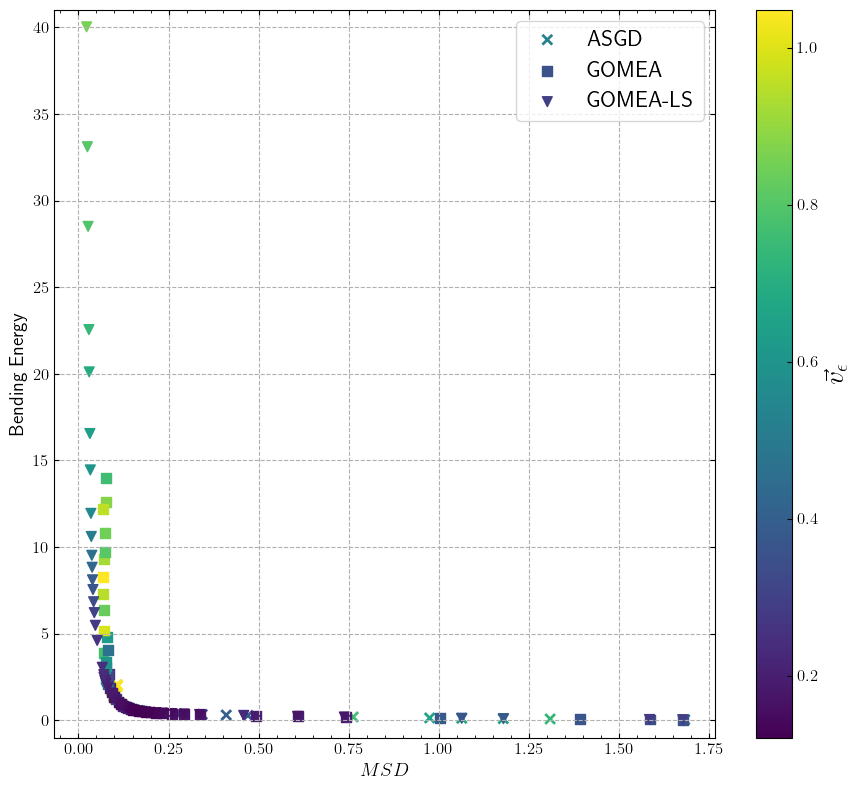

In [122]:
plt.figure(figsize=(9,8))

marker_size = 50

plt.scatter(df_asgd["metric0"], df_asgd["metric1"], label="ASGD", marker="x", c=df_asgd["dvf_rmse"], cmap="viridis", s=marker_size)
plt.scatter(df_gomea["metric0"], df_gomea["metric1"], label="GOMEA", marker="s", c=df_gomea["dvf_rmse"], cmap="viridis", s=marker_size)
plt.scatter(df_gomea_ls["metric0"], df_gomea_ls["metric1"], label="GOMEA-LS", marker="v", c=df_gomea_ls["dvf_rmse"], cmap="viridis", s=marker_size)

plt.xlabel("$MSD$")
plt.ylabel("Bending Energy")
plt.legend(prop={"size": 16})
plt.ylim(-1, 41)
cbar = plt.colorbar()
cbar.set_label("$\\vec{v}_{\\epsilon}$", size=20)

plt.tight_layout()
plt.savefig("pareto_fronts.pdf")

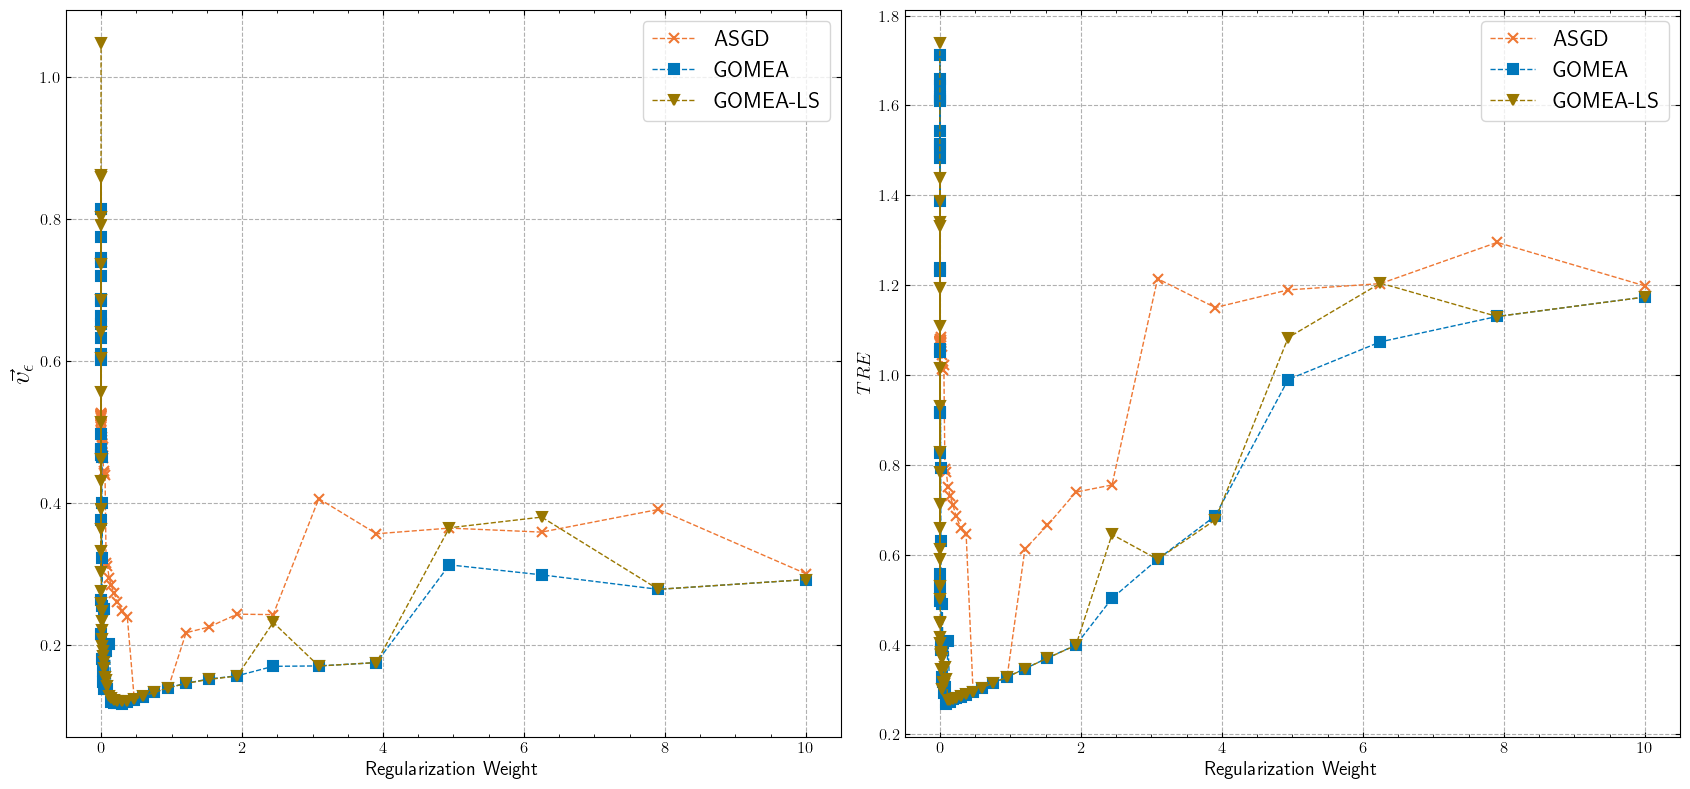

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(17,8))

marker_size = 7
marker_edge_width = 1.5
line_width = 1

axes[0].plot(df_asgd["Metric1Weight"], df_asgd["dvf_rmse"], '--x', label="ASGD", markersize=marker_size, linewidth=line_width, markeredgewidth=marker_edge_width)
axes[0].plot(df_gomea["Metric1Weight"], df_gomea["dvf_rmse"], '--s', label="GOMEA", markersize=marker_size, linewidth=line_width, markeredgewidth=marker_edge_width)
axes[0].plot(df_gomea_ls["Metric1Weight"], df_gomea_ls["dvf_rmse"], '--v', label="GOMEA-LS", markersize=marker_size, linewidth=line_width, markeredgewidth=marker_edge_width)

axes[0].set_xlabel("Regularization Weight")
axes[0].set_ylabel("$\\vec{v}_{\\epsilon}$", fontsize=20)
axes[0].legend(prop={"size": 16})

axes[1].plot(df_asgd["Metric1Weight"], df_asgd["tre"], '--x', label="ASGD", markersize=marker_size, linewidth=line_width, markeredgewidth=marker_edge_width)
axes[1].plot(df_gomea["Metric1Weight"], df_gomea["tre"], '--s', label="GOMEA", markersize=marker_size, linewidth=line_width, markeredgewidth=marker_edge_width)
axes[1].plot(df_gomea_ls["Metric1Weight"], df_gomea_ls["tre"], '--v', label="GOMEA-LS", markersize=marker_size, linewidth=line_width, markeredgewidth=marker_edge_width)

axes[1].set_xlabel("Regularization Weight")
axes[1].set_ylabel("$TRE$")
axes[1].legend(prop={"size": 16})

plt.tight_layout()
plt.savefig("validation_metrics.pdf")